Ques: Write a function that normalizes a given dataset using Min-Max

Follow-Up: Implement standard scaling (z-score normalization) instead of Min-Max scaling.

In [13]:
import numpy as np

def min_max_scaler(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

x = np.array([1, 2, 3, 4, 5])

print(min_max_scaler(x))

from sklearn.preprocessing import MinMaxScaler

data = x.reshape(-1,1)
print(x)
scaler = MinMaxScaler()
y = data.reshape(1,-1)
print(y)
normalizeddata = scaler.fit_transform(data)
print(normalizeddata)

[0.   0.25 0.5  0.75 1.  ]
[1 2 3 4 5]
[[1 2 3 4 5]]
[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


Question: Implement a simple linear regression model from scratch using gradient descent.

In [15]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
    return theta
theta = np.zeros(9)
print(theta.shape)



(9,)


(3750, 1)
(3750, 1)
(3750,)


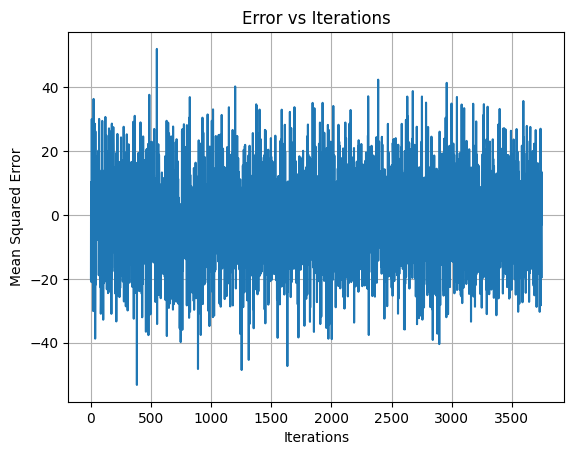

In [51]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# california_housing = fetch_california_housing()

# X = california_housing.data
# y = california_housing.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()

X_train = pd.read_csv('Linear_X_Train.csv').values

u=X_train.mean()
std=X_train.std()
X_train=(X_train-u)/std
print(X_train.shape)
y_train = pd.read_csv('Linear_Y_Train.csv').values
print(y_train.shape)

# Reshape y_train to (3750,) to match the expected format
y_train = y_train.flatten()
print(y_train.shape)

def linearRegression(X, y, learningrate = 0.1, n_iteration= 500):
    m, n = X.shape
    theta = np.zeros(n)
    errors = []
    for _ in range(n_iteration):
        prediction = X.dot(theta)
        erros = prediction - y
        gradient = 2/m * X.T.dot(erros)
        theta -= learningrate*gradient

        mse = (1/m) * np.sum(erros**2)
        errors.append(mse)
    return theta, erros

theta, errors = linearRegression(X_train, y_train)

import matplotlib.pyplot as plt
# Plot Error vs Iterations
plt.plot(errors)
plt.title('Error vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# y_pred = X_test.dot(theta)

# mse = mean_squared_error(y_test, y_pred)
# print(f'scratch algo: {mse}')

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# model.fit(X_train, y_train)
# y_prediction = model.predict(X_test)

# mses = mean_squared_error(y_test, y_prediction)
# print(f'sklearn model: {mses}')





Question: Implement logistic regression using gradient descent to classify binary data.

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
    return theta


Question: Write a function to implement the KNN algorithm for classification.


In [ ]:
import numpy as np
from collections import Counter

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return predictions


Question: Implement a simple Naive Bayes classifier for binary data.

In [ ]:
import numpy as np

def naive_bayes_train(X, y):
    classes = np.unique(y)
    mean_std_by_class = {}
    for c in classes:
        X_c = X[y == c]
        mean_std_by_class[c] = {
            "mean": np.mean(X_c, axis=0),
            "std": np.std(X_c, axis=0)
        }
    return mean_std_by_class

def naive_bayes_predict(X, mean_std_by_class):
    predictions = []
    for x in X:
        posteriors = []
        for c, params in mean_std_by_class.items():
            prior = np.log(1 / len(mean_std_by_class))
            likelihood = np.sum(
                np.log(1 / (np.sqrt(2 * np.pi) * params["std"])) -
                ((x - params["mean"]) ** 2 / (2 * params["std"] ** 2))
            )
            posteriors.append(prior + likelihood)
        predictions.append(np.argmax(posteriors))
    return predictions


Question: Implement the K-Means clustering algorithm from scratch.

In [ ]:
import numpy as np

def k_means(X, k, n_iterations=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(n_iterations):
        clusters = [[] for _ in range(k)]
        for x in X:
            distances = [np.linalg.norm(x - c) for c in centroids]
            clusters[np.argmin(distances)].append(x)
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return centroids, clusters


Implement PCA from scratch to reduce a dataset to k dimensions.

In [ ]:
import numpy as np

def pca(X, k):
    X_meaned = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :k]
    return np.dot(X_meaned, eigenvector_subset)
